<a href="https://colab.research.google.com/github/pachterlab/gget/blob/test_gget_alphafold/test_gget_alphafold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [gget alphafold](https://github.com/pachterlab/gget) test
Predict the 3D structure of a protein from its amino acid sequence using a simplified version of [DeepMind](https://www.deepmind.com/)’s [AlphaFold2](https://github.com/deepmind/alphafold) originally released and benchmarked for [AlphaFold Colab](https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb). To increase speed, set "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".  
Also see: [ColabFold](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb).

Written by Laura Luebbert.
___

In [1]:
# For pretty plots
%config InlineBackend.figure_format='retina'

Install and import gget:

In [3]:
!pip install -U gget
import gget

Use Miniconda to install OpenMM:  

(To install openmm v7.5.1 on your local machine, run `conda install -qy conda==4.13.0 && conda install -qy -c conda-forge openmm=7.5.1` Recommendation: Follow with `conda update -qy conda` to update conda to the latest version afterwards.)

In [ ]:
import sys
%shell rm -rf /opt/conda
%shell wget -q -P /tmp \
  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
    && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
    && rm /tmp/Miniconda3-latest-Linux-x86_64.sh

PATH=%env PATH
%env PATH=/opt/conda/bin:{PATH}
%shell conda install -qy conda==4.13.0 \
    && conda install -qy -c conda-forge \
      python=3.8 \
      openmm=7.5.1

# Add to path
sys.path.append('/opt/conda/lib/python3.8/site-packages')

Install third-part dependencies and download AlphaFold model parameters using `gget setup` (this might take a few minutes):

In [5]:
gget.setup("alphafold")

######################################################################## 100.0%


Predict the 3D structure of CASP14 target [T1024](https://predictioncenter.org/casp14/target.cgi?id=8&view=all):

Using the single-chain model.


Jackhmmer search: 100%|██████████| 147/147 [elapsed: 14:51 remaining: 00:00]



173 unique sequences found in total for sequence 1



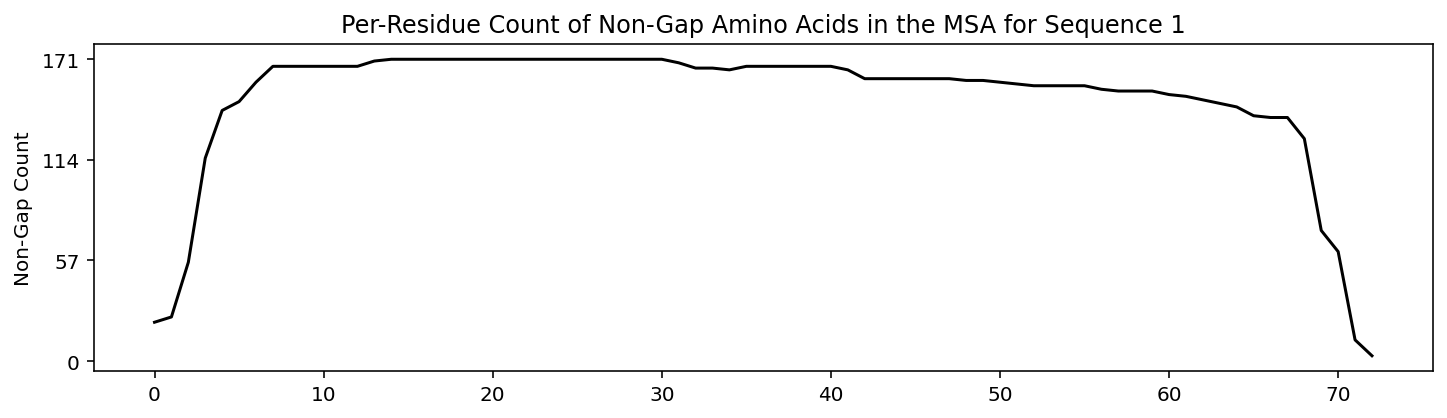

Running model_1:   0%|          | 0/7 [elapsed: 00:00 remaining: ?]/opt/conda/lib/python3.8/site-packages/alphafold/model/mapping.py:50: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  values_tree_def = jax.tree_flatten(values)[1]
/opt/conda/lib/python3.8/site-packages/alphafold/model/mapping.py:54: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(values_tree_def, flat_axes)
/opt/conda/lib/python3.8/site-packages/alphafold/model/mapping.py:129: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  flat_sizes = jax.tree_flatten(in_sizes)[0]
AMBER relaxation: 100%|██████████| 7/7 [elapsed: 12:05 remaining: 00:00]


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

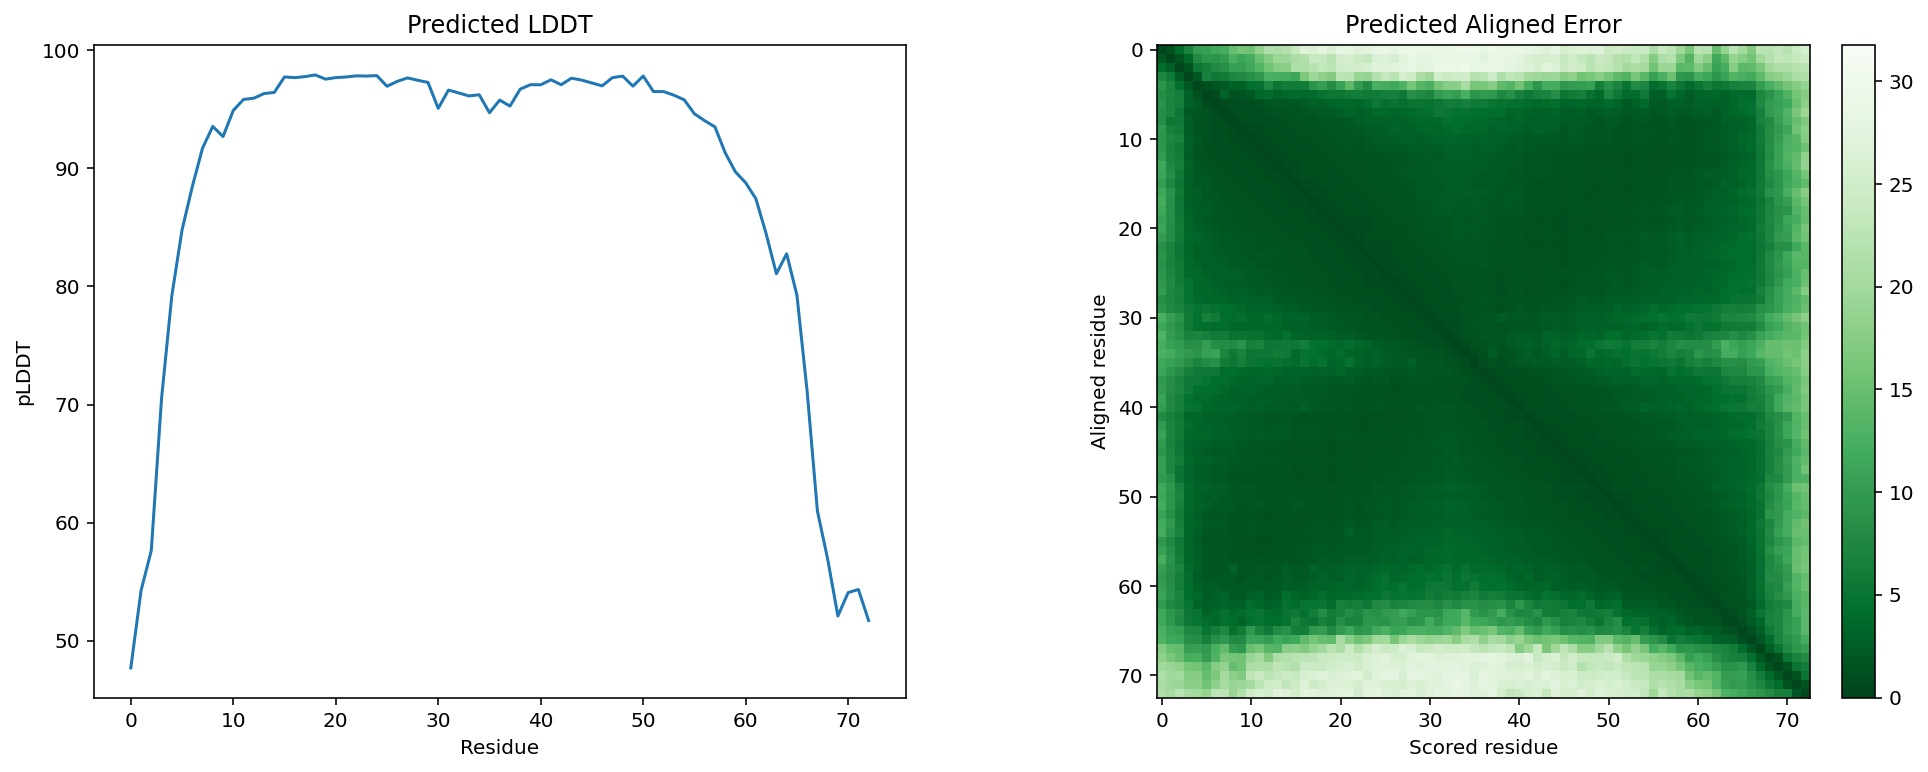

In [8]:
gget.alphafold("MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH", relax=True, out=None)

Predict the structure of the nicotine sensor 7S7U passed as a multimer instead of a single sequence (this takes more time since the MSA needs to be built for each sequence separately):

Using the multimer model with 3 sequences.


Jackhmmer search: 100%|██████████| 245/245 [elapsed: 25:41 remaining: 00:00]



2069 unique sequences found in total for sequence 1



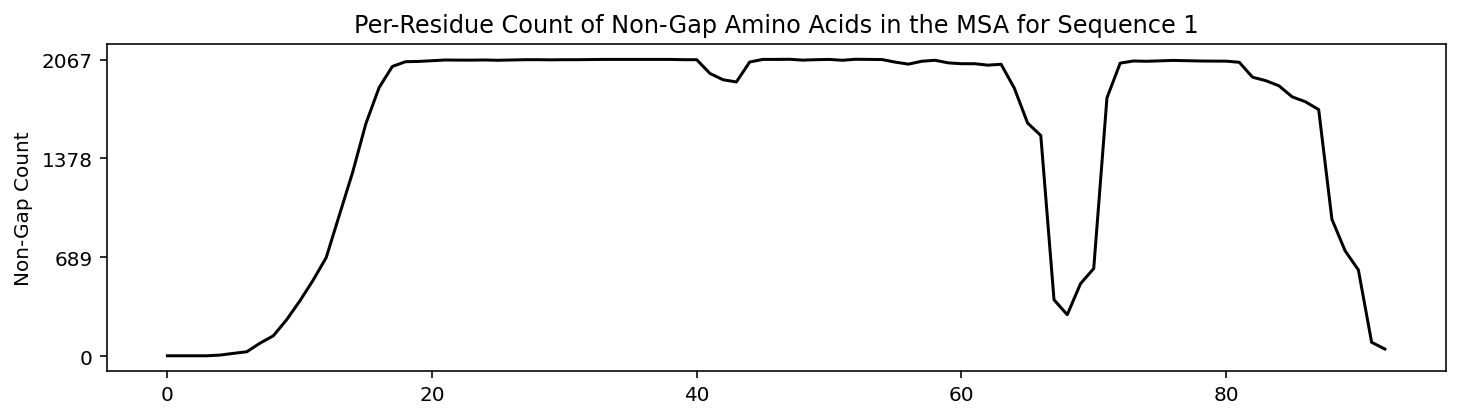

Jackhmmer search: 100%|██████████| 245/245 [elapsed: 26:30 remaining: 00:00]



502 unique sequences found in total for sequence 2



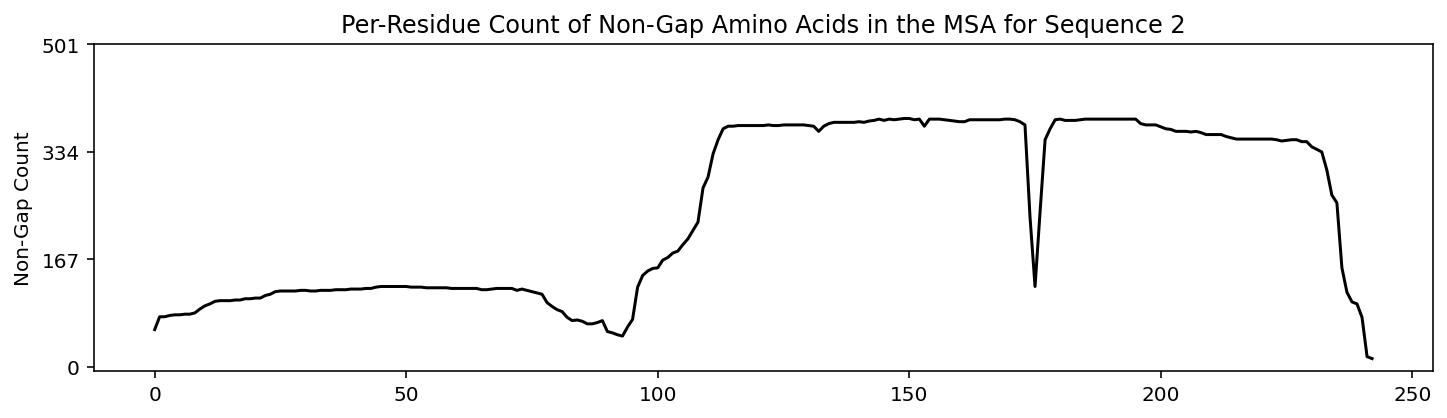

Jackhmmer search: 100%|██████████| 245/245 [elapsed: 26:24 remaining: 00:00]



11415 unique sequences found in total for sequence 3



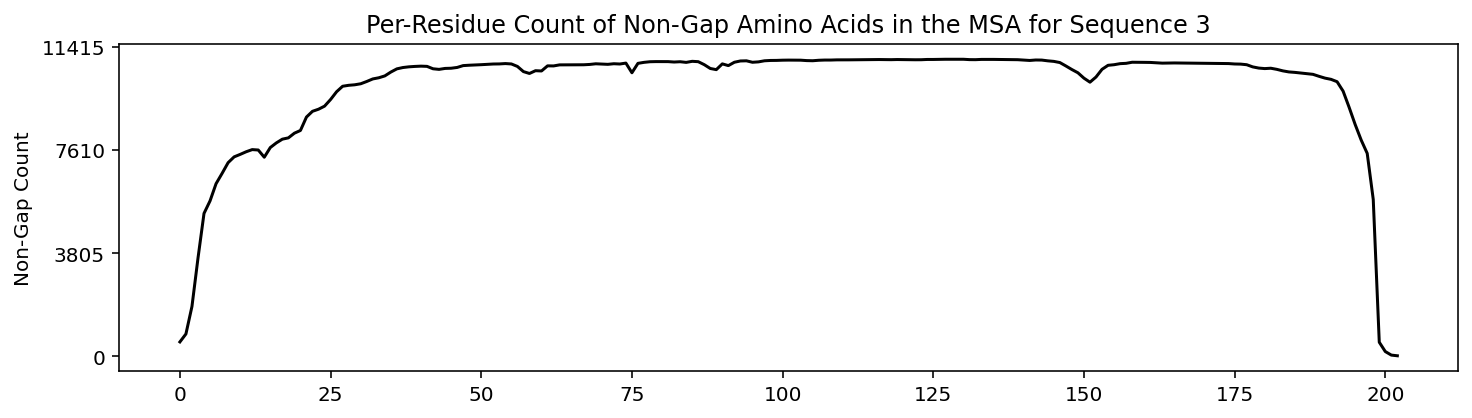

Running model_1_multimer_v2:   0%|          | 0/6 [elapsed: 00:00 remaining: ?]/opt/conda/lib/python3.8/site-packages/alphafold/model/geometry/struct_of_array.py:136: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  flat_array_like, inner_treedef = jax.tree_flatten(array_like)
/opt/conda/lib/python3.8/site-packages/alphafold/model/geometry/struct_of_array.py:209: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  value_dict[array_field] = jax.tree_unflatten(
/opt/conda/lib/python3.8/site-packages/alphafold/model/mapping.py:50: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  values_tree_def = jax.tree_flatten(values)[1]
/opt/conda/lib/python3.8/site-packages/alphafold/model/mapping.py:54: FutureWarning: jax.tree_unflatten is deprecated, and will

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

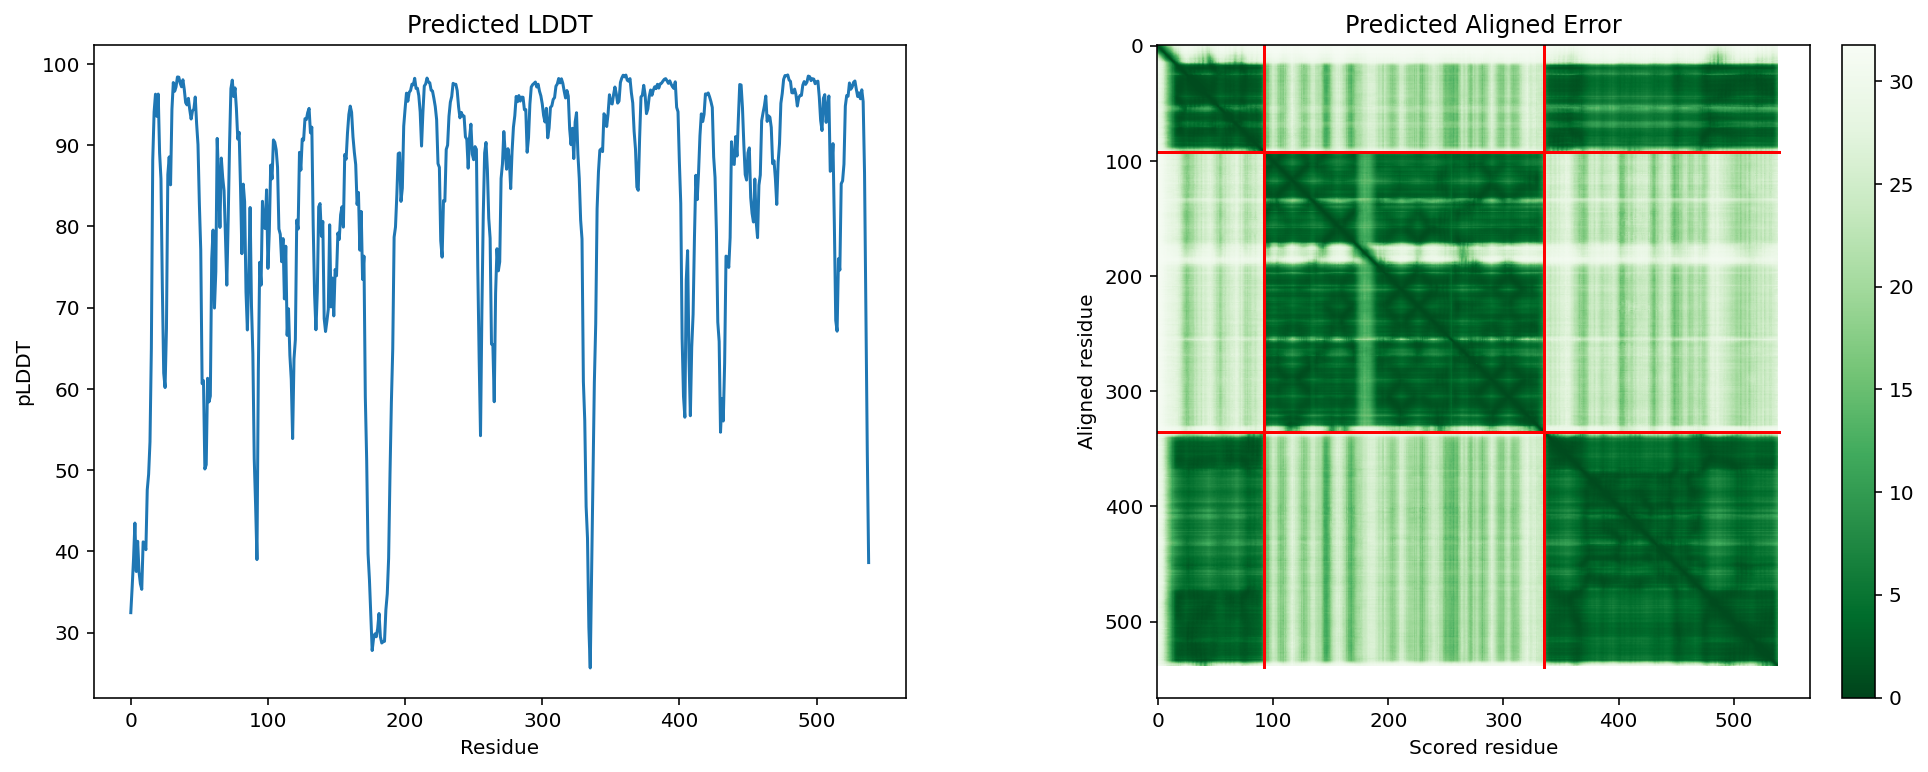

In [10]:
gget.alphafold(
    [
        "MHHHHHHGAQPARSANDTVVVGSINFTEGIIVANMVAEMIEAHTDLKVVRKLNLGGENVNFEAIKRGGANNGIDIYVEYTGHGLVDILGFPEP",
        "NVYITADKQKNGIKANFKIRHNMEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSVLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMSKGEELFTGVVPILVELDGGVNGHKFSVRGEGEGDATNGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTISFKDDGTYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNFPP",
        "PSSTDPEGAYETVKKEYKRKWNIVWLKPLGFNNTYTLTVKDELAKQYNLKTFSDLAKISDKLILGATMFFLEGPDGYPGLQKLYNFKFKHTKSMDMGIRYTAIDNNEVQVIDAWATDGLLVSHKLKILEDDKAFFPPYYAAPIIRQDVLDKHPELKDVLNKLANQISLEEMQKLNYKVDGEGQDPAKVAKEFLKEKGLILQVD"
     ],
    show_sidechains=False,
    out=None
)